### Task 02: Using Python to analyze data and create an investing/trading strategy using simple moving average crossover
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
files.upload()

Saving HINDALCO.csv to HINDALCO.csv


{'HINDALCO.csv': b'datetime,close,high,low,open,volume,instrument\r\n2014-01-24 00:00:00,114,115.35,113,113.15,5737135,HINDALCO\r\n2014-01-27 00:00:00,111.1,112.7,109.3,112,8724577,HINDALCO\r\n2014-01-28 00:00:00,113.8,115,109.75,110,4513345,HINDALCO\r\n2014-01-29 00:00:00,111.75,114.75,111.15,114.5,4713458,HINDALCO\r\n2014-01-30 00:00:00,108.1,110.7,107.6,110.2,5077231,HINDALCO\r\n2014-01-31 00:00:00,109.55,110,107,109.05,8287236,HINDALCO\r\n2014-02-03 00:00:00,103.45,109.4,103,109,5572627,HINDALCO\r\n2014-02-04 00:00:00,102.45,103.45,99.8,102,13935173,HINDALCO\r\n2014-02-05 00:00:00,104.25,105.15,101,102.4,9106760,HINDALCO\r\n2014-02-06 00:00:00,105.75,106.5,103.1,104.65,10194884,HINDALCO\r\n2014-02-07 00:00:00,106.4,107.7,104.75,106.15,9650511,HINDALCO\r\n2014-02-10 00:00:00,106.8,107.7,105.8,106.45,3124538,HINDALCO\r\n2014-02-11 00:00:00,104.55,107.1,104.25,106.9,3964390,HINDALCO\r\n2014-02-12 00:00:00,103.5,105.6,103.05,105.15,5325176,HINDALCO\r\n2014-02-13 00:00:00,100.2,104.55,9

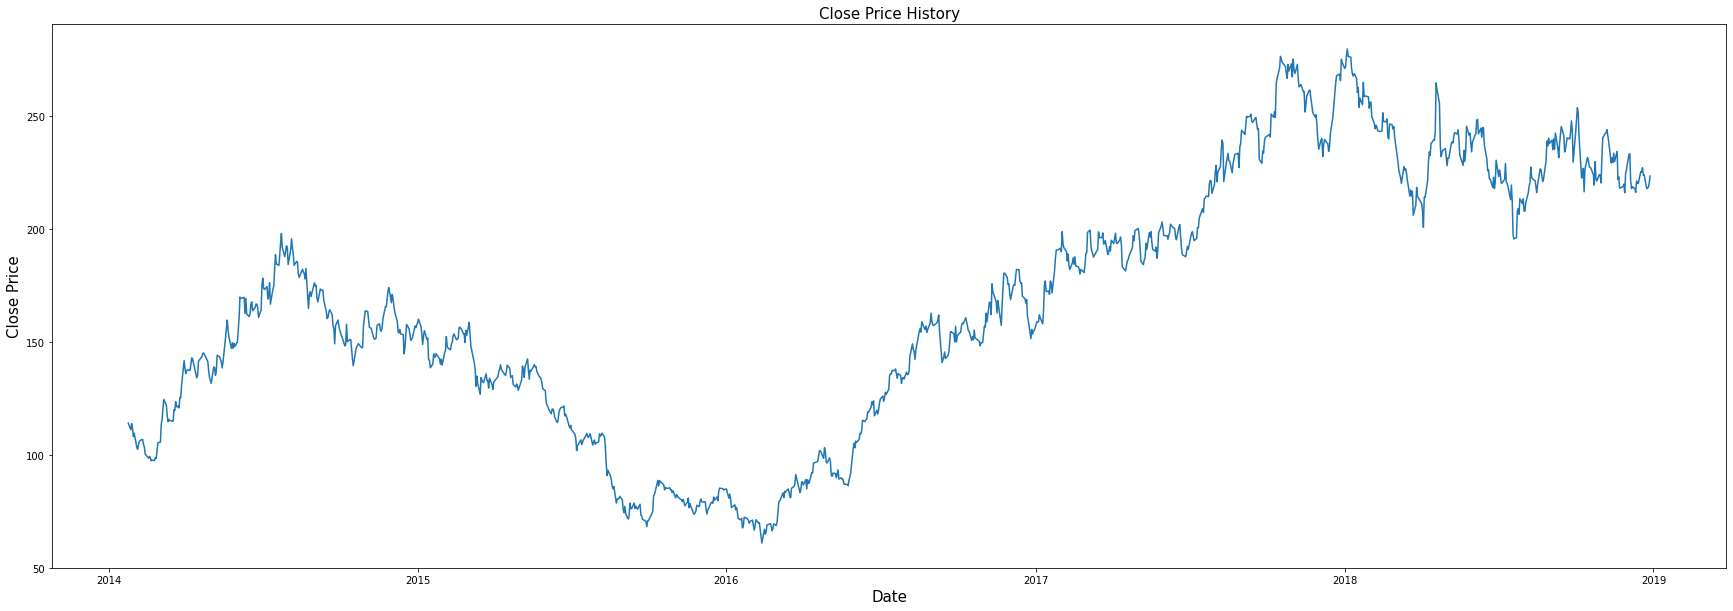

,datetime,close,high,low,open,volume,instrument
2014-01-24,2014-01-24 00:00:00,114.00,115.35,113.00,113.15,5737135,HINDALCO
2014-01-27,2014-01-27 00:00:00,111.10,112.70,109.30,112.00,8724577,HINDALCO
2014-01-28,2014-01-28 00:00:00,113.80,115.00,109.75,110.00,4513345,HINDALCO
2014-01-29,2014-01-29 00:00:00,111.75,114.75,111.15,114.50,4713458,HINDALCO
2014-01-30,2014-01-30 00:00:00,108.10,110.70,107.60,110.20,5077231,HINDALCO
...,...,...,...,...,...,...,...
2018-12-21,2018-12-21 00:00:00,224.00,227.45,221.80,224.25,6933691,HINDALCO
2018-12-24,2018-12-24 00:00:00,217.85,224.00,216.95,224.00,4667022,HINDALCO
2018-12-26,2018-12-26 00:00:00,218.60,219.80,212.90,213.85,6554865,HINDALCO
2018-12-27,2018-12-27 00:00:00,220.60,223.90,219.60,221.40,7947144,HINDALCO


In [4]:
df = pd.read_csv('HINDALCO.csv')
df = df.set_index(pd.DatetimeIndex(df['datetime'].values))

plt.figure(figsize=(30,10))
plt.title("Close Price History", fontsize=15)
plt.plot(df.close)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Close Price", fontsize=15)
plt.show()
df

### Function to calculate Moving Average:
---

In [5]:
def SimpleMovingAverage(data, period, column="close"):
  return data[column].rolling(window=period).mean()

In [6]:
df['MA-SHORT-SPAN'] = SimpleMovingAverage(df, 7)
df['MA-LONG-SPAN'] = SimpleMovingAverage(df, 50)

In [7]:
df['Signal'] = np.where(df['MA-SHORT-SPAN'] > df["MA-LONG-SPAN"], 1, 0)
df['Position'] = df['Signal'].diff()

df['Buy'] = np.where(df['Position'] == 1, df['close'], np.NaN)
df['Sell'] = np.where(df['Position'] == -1, df['close'], np.NaN)
df

,datetime,close,high,low,open,volume,instrument,MA-SHORT-SPAN,MA-LONG-SPAN,Signal,Position,Buy,Sell
2014-01-24,2014-01-24 00:00:00,114.00,115.35,113.00,113.15,5737135,HINDALCO,NaN,NaN,0,NaN,NaN,NaN
2014-01-27,2014-01-27 00:00:00,111.10,112.70,109.30,112.00,8724577,HINDALCO,NaN,NaN,0,0.0,NaN,NaN
2014-01-28,2014-01-28 00:00:00,113.80,115.00,109.75,110.00,4513345,HINDALCO,NaN,NaN,0,0.0,NaN,NaN
2014-01-29,2014-01-29 00:00:00,111.75,114.75,111.15,114.50,4713458,HINDALCO,NaN,NaN,0,0.0,NaN,NaN
2014-01-30,2014-01-30 00:00:00,108.10,110.70,107.60,110.20,5077231,HINDALCO,NaN,NaN,0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,2018-12-21 00:00:00,224.00,227.45,221.80,224.25,6933691,HINDALCO,223.742857,226.302,0,0.0,NaN,NaN
2018-12-24,2018-12-24 00:00:00,217.85,224.00,216.95,224.00,4667022,HINDALCO,223.392857,226.121,0,0.0,NaN,NaN
2018-12-26,2018-12-26 00:00:00,218.60,219.80,212.90,213.85,6554865,HINDALCO,223.171429,226.163,0,0.0,NaN,NaN
2018-12-27,2018-12-27 00:00:00,220.60,223.90,219.60,221.40,7947144,HINDALCO,222.478571,226.041,0,0.0,NaN,NaN


### **Visual Representaion or Buy & Sell Signals**
---

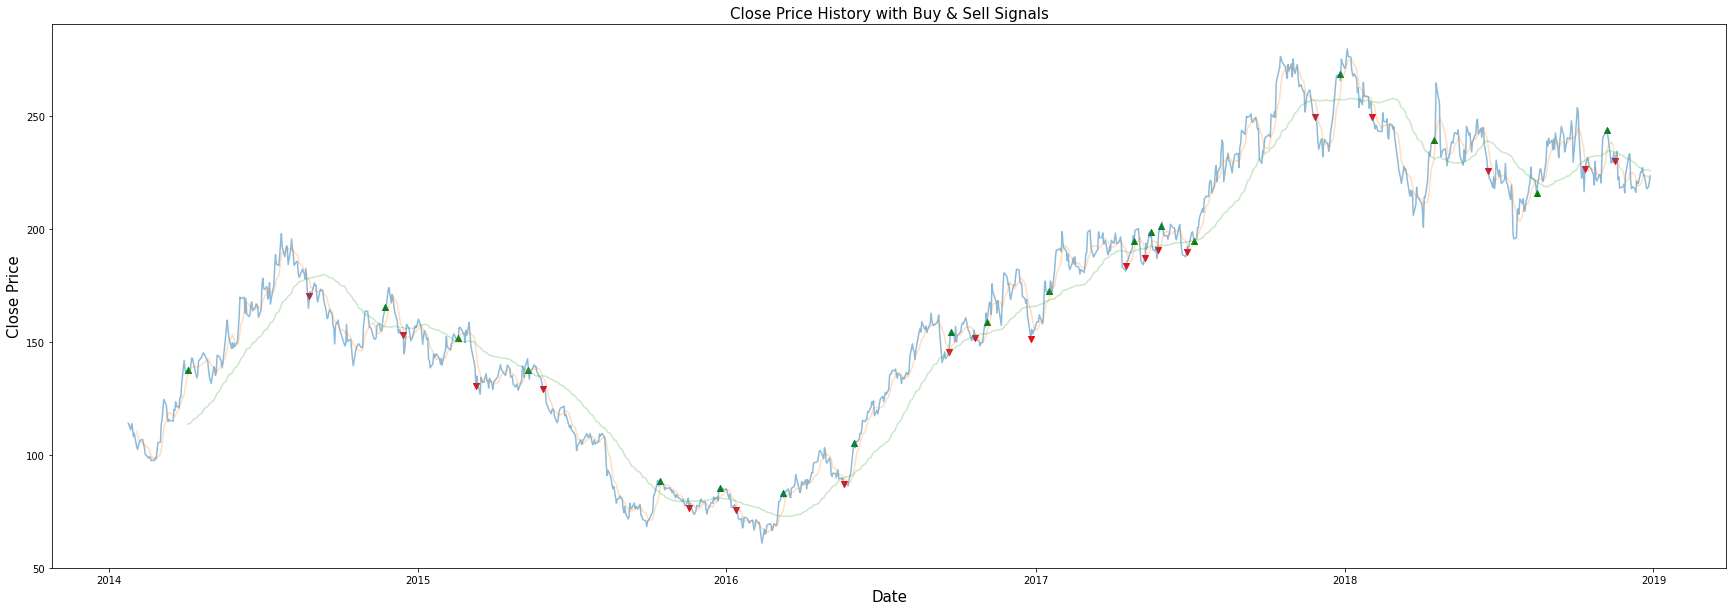

In [9]:
plt.figure(figsize=(30,10))
plt.title("Close Price History with Buy & Sell Signals", fontsize=15)
plt.plot(df.close, alpha=0.5, label="Close")
plt.plot(df["MA-SHORT-SPAN"], alpha=0.25, label="MA-SHORT-SPAN")
plt.plot(df["MA-LONG-SPAN"], alpha=0.25, label="MA-LONG-SPAN")

plt.scatter(df.index, df.Buy, alpha=1, label="Buy Signal", marker='^', color='green')
plt.scatter(df.index, df.Sell, alpha=1, label="Sell Signal", marker='v', color='red')

plt.xlabel("Date", fontsize=15)
plt.ylabel("Close Price", fontsize=15)
plt.show()